Working file for Goup Project 

Data
-   https://www.fao.org/faostat/en/#data/QCL
-   https://data.worldbank.org/
-   https://data.worldbank.org/indicator/AG.LND.PRCP.MM?end=2019&start=2019&view=map

Importing all libarys 

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot


1. Dataset

Import

In [2]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1')

Cleaning

In [3]:
df2 = df.dropna(how = 'any') # removing all missing data 
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. Big loss of information!! 
df2 = pd.melt(df2, id_vars=['Area', "Item", "Element", "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})
df2

,Area,Item,Element,Unit,Year,yield_amound
0,Afghanistan,Apples,Area harvested,ha,1961,2220.00
1,Afghanistan,Apples,Yield,hg/ha,1961,68018.00
2,Afghanistan,Apples,Production,tonnes,1961,15100.00
3,Afghanistan,Apricots,Area harvested,ha,1961,4820.00
4,Afghanistan,Apricots,Yield,hg/ha,1961,66390.00
...,...,...,...,...,...,...
1772777,Zimbabwe,Sugar Crops Primary,Yield,hg/ha,2021,734043.00
1772778,Zimbabwe,Sugar Crops Primary,Production,tonnes,2021,3450000.00
1772779,Zimbabwe,Vegetables Primary,Area harvested,ha,2021,35148.00
1772780,Zimbabwe,Vegetables Primary,Yield,hg/ha,2021,66770.00


2. Dataset 

Import

In [4]:
dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')

Cleaning

In [36]:
dr2 = dr.dropna(how = 'any') # removing all missing data 
dr2 = dr2.drop(["Domain", "ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})
dr2

,Area,Element,Item,Year,Unit,pesticide_amound
0,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121.0
1,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121.0
2,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121.0
3,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121.0
4,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201.0
...,...,...,...,...,...,...
66275,Zimbabwe,Agricultural Use,Other Pesticides nes,2016,tonnes,0.0
66276,Zimbabwe,Agricultural Use,Other Pesticides nes,2017,tonnes,0.0
66277,Zimbabwe,Agricultural Use,Other Pesticides nes,2018,tonnes,0.0
66278,Zimbabwe,Agricultural Use,Other Pesticides nes,2019,tonnes,0.0


In [39]:
#dr2 = dr2[dr2["Unit"] == "tonnes"]
#dr2 = dr2.drop_duplicates(subset=['Item', 'Area', "Year"], keep='last')
#dr2 = dr2.pivot(index = ["Year", "Area"], columns = "Item", values = "pesticide_amound")

3. Dataset 

Import

In [7]:
di = pd.read_csv("data/temp.csv", encoding='latin-1')

Cleaning

In [8]:
di2 = di.dropna(how = 'any') # removing all missing data 
di2 = di2.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 
di2

,Year,Area,avg_temp
0,1849,CÃ´te D'Ivoire,25.58
1,1850,CÃ´te D'Ivoire,25.52
2,1851,CÃ´te D'Ivoire,25.67
7,1856,CÃ´te D'Ivoire,26.28
8,1857,CÃ´te D'Ivoire,25.17
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


4. Dataset

Import

In [9]:
dk = pd.read_csv("data/2019 2020.csv", encoding='latin-1')

Cleaning

In [10]:
dk2 = dk.dropna(how = 'any') # removing all missing data
dk2

,ï»¿Area,Code,Indicator,IndicatorCode,Stop,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66


5.Dataset

Merge the Datasets 

In [11]:
merged = pd.merge(df2, dr2, on= ["Area", "Year"])
merged = pd.merge(di2, merged, on= ["Area", "Year"])
merged

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
0,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
2,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
3,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
4,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


Data exploration 

In [12]:
merged.groupby('Item_x',sort=True)['yield_amound'].sum().nlargest(10)

Item_x
Cereals, primary                               9.297335e+12
Meat of pig with the bone, fresh or chilled    5.465501e+12
Sugar Crops Primary                            5.340561e+12
Sugar cane                                     5.102225e+12
Sheep and Goats                                4.961783e+12
Cattle and Buffaloes                           4.908583e+12
Swine / pigs                                   4.256771e+12
Rice                                           4.077630e+12
Vegetables Primary                             3.928121e+12
Cattle                                         3.612434e+12
Name: yield_amound, dtype: float64

In [13]:
merged.groupby(['Area'],sort=True)['yield_amound'].sum().nlargest(10)

Area
China        4.942422e+13
India        3.664260e+13
Brazil       3.937322e+12
Pakistan     1.739168e+12
Germany      1.001453e+12
Indonesia    5.081216e+11
Australia    4.572027e+11
Japan        4.570322e+11
Italy        3.929370e+11
Mexico       3.678594e+11
Name: yield_amound, dtype: float64

In [14]:
merged.describe()

,Year,avg_temp,yield_amound,pesticide_amound
count,1.589302e+07,1.589302e+07,1.589302e+07,1.589302e+07
mean,2.001206e+03,1.962269e+01,6.218698e+06,1.414622e+04
std,6.787649e+00,6.921072e+00,3.210777e+07,4.090813e+04
min,1.990000e+03,-3.370000e+00,0.000000e+00,0.000000e+00
25%,1.995000e+03,1.523000e+01,1.342900e+04,3.657000e+01
50%,2.001000e+03,2.104000e+01,1.096900e+05,7.427100e+02
75%,2.007000e+03,2.592000e+01,8.300000e+05,6.763400e+03
max,2.013000e+03,3.042000e+01,7.680904e+08,3.677780e+05


In [15]:
merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15893015 entries, 0 to 15893014
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Year              int64  
 1   Area              object 
 2   avg_temp          float64
 3   Item_x            object 
 4   Element_x         object 
 5   Unit_x            object 
 6   yield_amound      float64
 7   Domain            object 
 8   Element_y         object 
 9   Item_y            object 
 10  Unit_y            object 
 11  pesticide_amound  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ GB


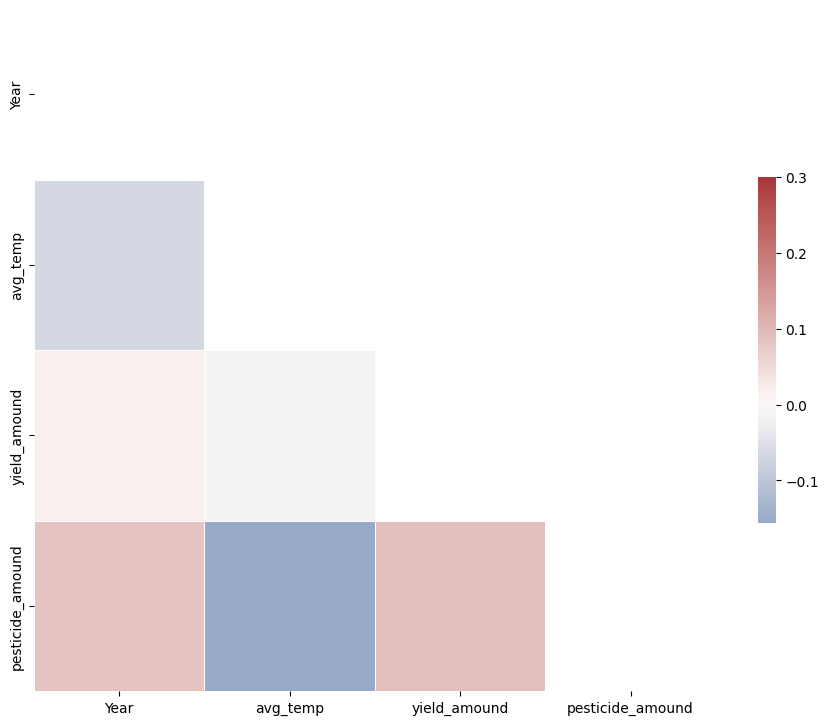

In [16]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
correlation_data=merged.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


No significant correlation 

In [17]:
merged_cereal = merged[merged["Item_x"]== "Cereals, primary"]
merged_cereal = merged_cereal[merged_cereal["Unit_x"] == "tonnes"]

In [18]:
merged_cereal

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
1112,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1113,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
1114,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
1115,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
1116,1990,Ghana,26.73,"Cereals, primary",Production,tonnes,843800.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15892848,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15892849,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15892850,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15892851,2013,Namibia,20.73,"Cereals, primary",Production,tonnes,86599.74,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


In [19]:
merged

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
0,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
2,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
3,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
4,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


In [20]:
# Assuming you have a dataframe called 'df'
merged_small = merged.sample(frac= .15)
# Specify the file path and name for the CSV file
csv_file_path = 'data/file.csv'

# Use the 'to_csv' function to save the dataframe as a CSV file
merged.to_csv(csv_file_path, index=False)

OSError: [Errno 22] Invalid argument: 'data/file.csv'

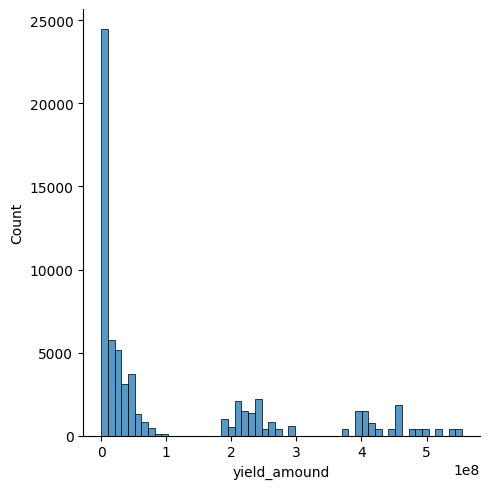

In [ ]:
sns.displot(merged_cereal['yield_amound'])

bad distribution. Probably because of the huge amound of categories 

fuck!!

[(0.0, 1843876296.7189999)]

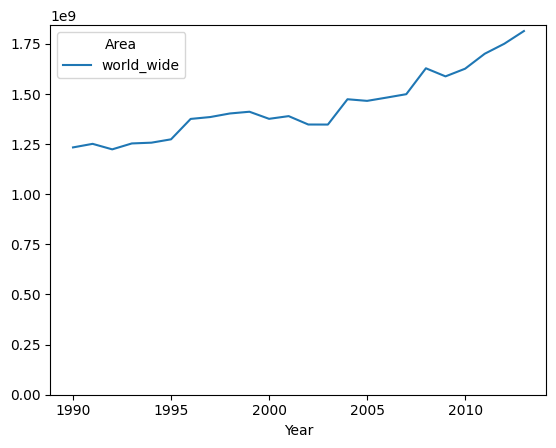

In [ ]:
merged_cereal_wide = merged_cereal.drop_duplicates(subset=['Area', 'Year'], keep='last')
merged_cereal_wide = merged_cereal_wide.pivot(index= "Year",columns= "Area",values= "yield_amound")
merged_cereal_wide['world_wide'] = merged_cereal_wide[list(merged_cereal_wide.columns)].sum(axis=1)
p1 = sns.lineplot(data=merged_cereal_wide[["world_wide"]])
p1.set(ylim=(0))

[(0.0, 582102519.912)]

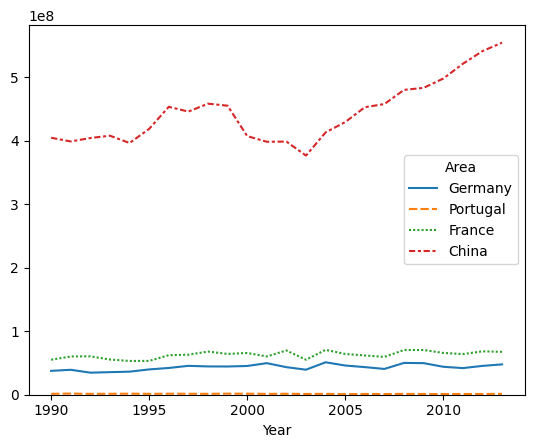

In [ ]:
p1 = sns.lineplot(data=merged_cereal_wide[["Germany", "Portugal", "France", "China"]])
p1.set(ylim=(0))

[(0.0, 1.5152022823587972)]

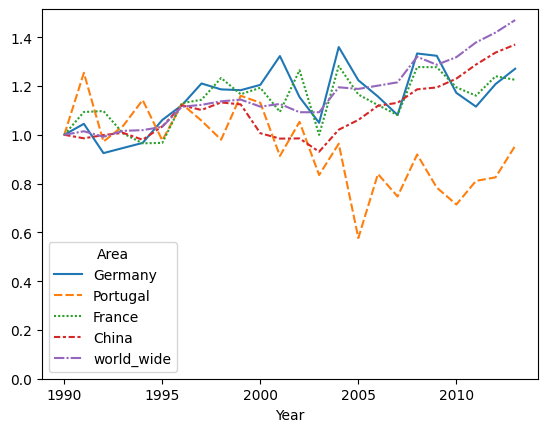

In [ ]:
merged_cereal_wide_div = merged_cereal_wide.div(merged_cereal_wide.iloc[0]) 
p1 = sns.lineplot(data = merged_cereal_wide_div[["Germany", "Portugal", "France", "China", "world_wide"]])
p1.set(ylim=(0))

should acompanied by an graph showing the increase by percent. Small producers might grow a lot.                     
-   to archive that: divide by first year 

too many contrys are shown-- 5 should be selected for a clear graph 

better as collums (for one relevant contry (for storyline))

same for pesticides 

[(0.0, 127802.98349999999)]

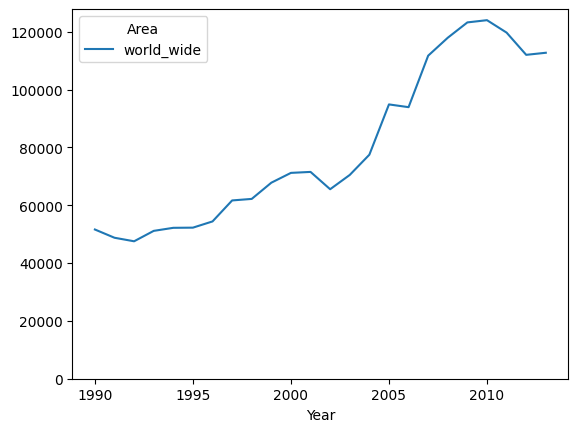

In [ ]:
merged_cereal_wide = merged_cereal.drop_duplicates(subset=['Area', 'Year'], keep='last')
merged_cereal_wide = merged_cereal_wide.pivot(index= "Year",columns= "Area",values= "pesticide_amound") 
merged_cereal_wide['world_wide'] = merged_cereal_wide[list(merged_cereal_wide.columns)].sum(axis=1)
p1 = sns.lineplot(data=merged_cereal_wide[["world_wide"]])
p1.set(ylim=(0))

[(0.0, 2.522905508487387)]

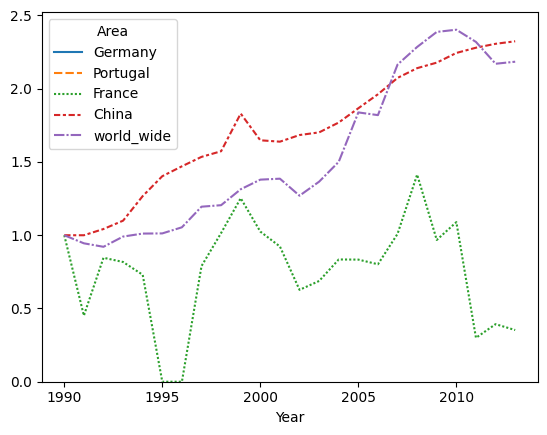

In [ ]:
merged_cereal_wide_div = merged_cereal_wide.div(merged_cereal_wide.iloc[0]) 
p1 = sns.lineplot(data = merged_cereal_wide_div[["Germany", "Portugal", "France", "China", "world_wide"]])
p1.set(ylim=(0))

# Cluster contries (PCA)

In [ ]:
merged_cereal_wide

Area,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahamas,Bangladesh,Botswana,Brazil,...,Suriname,Sweden,Switzerland,Thailand,Tunisia,Uganda,Uruguay,Zambia,Zimbabwe,world_wide
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.00,121.53,3.0,0.00,250.00,0.0,2.68,0.00,0.0,0.00,...,0.0,0.0,0.00,18.00,10.00,40.0,0.00,251.00,1561.0,51598.92
1991,0.00,198.79,0.0,0.00,250.00,0.0,2.84,0.00,1.0,1153.22,...,0.0,0.0,0.00,18.00,10.00,40.0,0.00,251.00,2169.0,48746.14
1992,0.00,140.39,0.0,0.00,311.00,0.0,2.79,5.00,0.0,2306.44,...,0.0,0.0,0.00,18.00,10.00,40.0,0.00,251.00,1177.0,47524.32
1993,0.00,32.29,2.0,0.00,335.00,0.0,3.47,1.00,0.0,3459.67,...,0.0,0.0,0.00,18.00,10.00,1.0,0.00,251.00,0.0,51124.88
1994,0.00,85.25,2.0,0.00,295.00,0.0,4.15,4.00,0.0,4612.89,...,0.0,0.0,0.00,32.00,10.00,3.0,0.00,251.00,0.0,52181.01
1995,0.00,253.21,1.0,0.00,359.00,0.0,3.71,5.00,0.0,5766.11,...,0.0,0.0,0.00,30.00,10.00,30.0,0.00,91.00,0.0,52239.54
1996,0.49,8.71,1.0,0.00,467.00,0.0,4.84,4.00,0.0,6919.33,...,0.0,0.0,0.00,74.00,10.00,38.0,0.00,616.00,0.0,54389.52
1997,0.99,21.04,1.0,0.00,481.00,0.6,5.94,5.00,0.0,8072.56,...,0.0,0.0,0.00,107.00,10.00,38.0,0.00,600.95,0.0,61648.31
1998,1.48,67.47,1.0,0.00,458.00,0.3,5.93,20.00,0.0,9225.78,...,0.0,0.0,0.00,126.00,12.90,38.0,0.00,585.90,0.0,62178.15


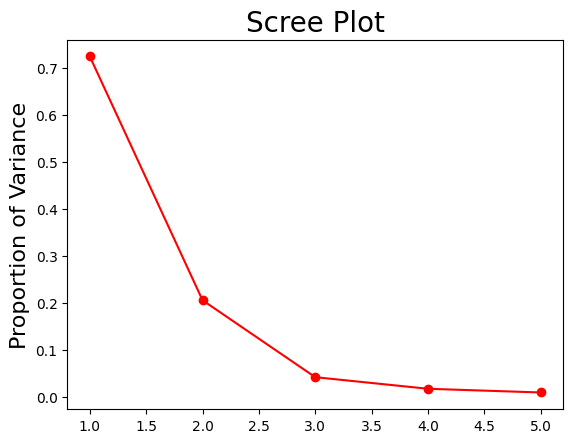

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
merged_cereal_wide_scaled = StandardScaler().fit_transform(merged_cereal_wide)
df_scaled = pd.DataFrame(data=merged_cereal_wide_scaled, 
                                columns=merged_cereal_wide.columns)
df_scaled_intresting = df_scaled[["Germany", "Portugal", "France", "China", "world_wide"]]
pca = PCA(n_components=5)
pca.fit_transform(df_scaled_intresting)
eigenvalues = pca.explained_variance_ # eigenvalues
prop_var = pca.explained_variance_ratio_ # proportion of explained variance
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()

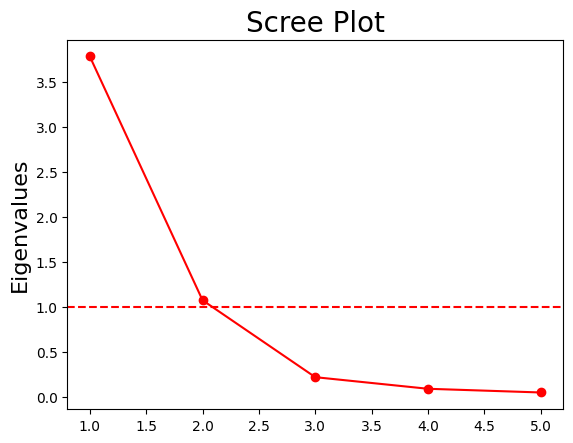

In [ ]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         eigenvalues,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=16)
plt.axhline(y=1, color='r', 
            linestyle='--')

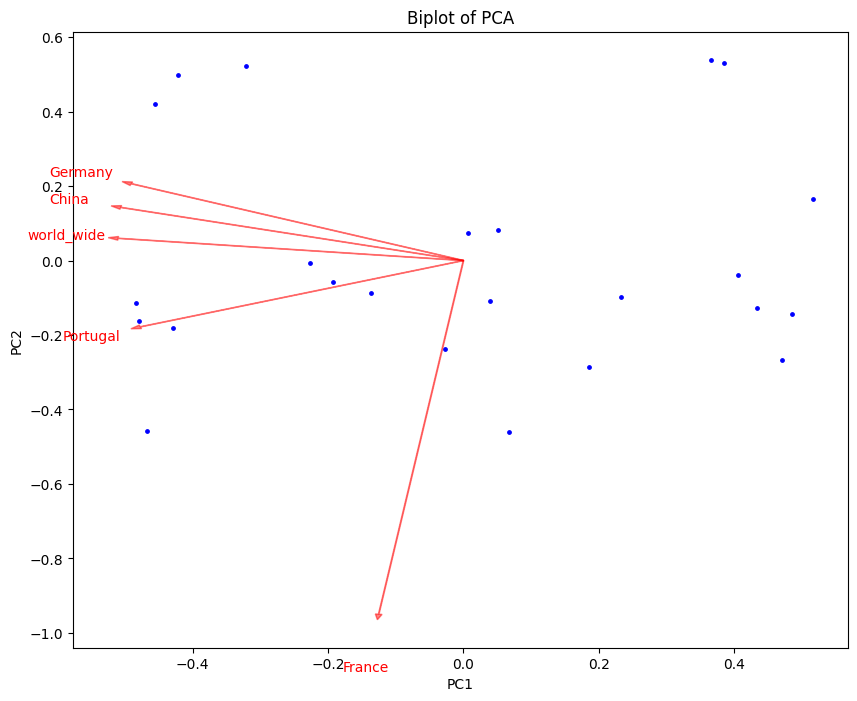

<Figure size 640x480 with 0 Axes>

In [ ]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled_intresting)
pca_intersting = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
# "score" - Scores of each object (for each PC) - PC
# "coef" - PCA variable loadings (for each PC) - pca.components_
# labels - name of variables - list(df.columns)


def biplot(score,coef,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    plt.scatter(xs * scalex,ys * scaley,
                s=6, 
                color='blue') # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'red', 
                 ha = 'center', 
                 va = 'center') # variable labels for each arrow
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(df_scaled_intresting.columns))


same with differend products 


In [ ]:
merged

,Year,Area,avg_temp,Item_x,Element_x,Unit_x,yield_amound,Domain,Element_y,Item_y,Unit_y,pesticide_amound
0,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Pesticides (total),tonnes,65.8
1,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Insecticides,tonnes,32.4
2,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Herbicides,tonnes,8.0
3,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,25.0
4,1990,Ghana,26.73,Asses,Stocks,Head,10398.00,Pesticides Use,Agricultural Use,Fungicides â Seed treatments,tonnes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15893010,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Insecticides,tonnes,9.0
15893011,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Herbicides,tonnes,17.0
15893012,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Fungicides and Bactericides,tonnes,18.0
15893013,2013,Namibia,20.73,Vegetables Primary,Production,tonnes,60587.49,Pesticides Use,Agricultural Use,Plant Growth Regulators,tonnes,4.0


In [ ]:
merged_wide = merged[merged["Unit_x"] == "tonnes"]
merged_wide = merged_wide.drop_duplicates(subset=['Item_x', 'Area', "Year"], keep='last')
merged_wide = merged_wide.pivot(index = ["Year", "Area"], columns= "Item_x",values= "yield_amound")
main_products = merged.groupby('Item_x',sort=True)['yield_amound'].sum().nlargest(10).to_frame()
main_products = main_products.reset_index()
#merged_wide['world_wide'] = merged_wide[list(merged_wide.columns)].sum(axis=1)


In [ ]:
main_products

,Item_x,yield_amound
0,"Cereals, primary",9.297335e+12
1,"Meat of pig with the bone, fresh or chilled",5.465501e+12
2,Sugar Crops Primary,5.340561e+12
3,Sugar cane,5.102225e+12
4,Sheep and Goats,4.961783e+12
5,Cattle and Buffaloes,4.908583e+12
6,Swine / pigs,4.256771e+12
7,Rice,4.077630e+12
8,Vegetables Primary,3.928121e+12
9,Cattle,3.612434e+12


In [ ]:
merged_wide

Item_x          Abaca, manila hemp, raw  Agave fibres, raw, n.e.c.   
Year Area                                                            
1990 Albania                        NaN                        NaN  \
     Algeria                        NaN                        NaN   
     Angola                         NaN                        NaN   
     Argentina                      NaN                        NaN   
     Australia                      NaN                        NaN   
...                                 ...                        ...   
2013 Tunisia                        NaN                        NaN   
     Uganda                         NaN                        NaN   
     Uruguay                        NaN                        NaN   
     Zambia                         NaN                        NaN   
     Zimbabwe                       NaN                        NaN   

Item_x          Almonds, in shell   
Year Area                           
1990 Albania                  NaN  \
     Algeria              11733.0   
     Angola                   NaN   
     Argentina              451.0   
     Australia                NaN   
...                           ...   
2013 Tunisia              52000.0   
     Uganda                   NaN   
     Uruguay                  NaN   
     Zambia                   NaN   
     Zimbabwe                 NaN   

Item_x          Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw   
Year Area                                                                                   
1990 Albania                                                  NaN                          \
     Algeria                                                  NaN                           
     Angola                                                   NaN                           
     Argentina                                            2300.00                           
     Australia                                                NaN                           
...                                                           ...                           
2013 Tunisia                                             11401.74                           
     Uganda                                                   NaN                           
     Uruguay                                                  NaN                           
     Zambia                                                   NaN                           
     Zimbabwe                                                 NaN                           

Item_x            Apples  Apricots  Areca nuts  Artichokes  Asparagus   
Year Area                                                               
1990 Albania     13100.0    1700.0         NaN         NaN        NaN  \
     Algeria     38941.0   34979.0         NaN      6250.0        NaN   
     Angola          NaN       NaN         NaN         NaN        NaN   
     Argentina  975600.0   19100.0         NaN     72000.0     4843.0   
     Australia  319403.0   29685.0         NaN         NaN     6511.0   
...                  ...       ...         ...         ...        ...   
2013 Tunisia    120000.0   29500.0         NaN     19000.0        NaN   
     Uganda          NaN       NaN         NaN         NaN        NaN   
     Uruguay     45626.0       NaN         NaN         NaN        NaN   
     Zambia          NaN       NaN         NaN         NaN        NaN   
     Zimbabwe     6500.0       NaN         NaN         NaN        NaN   

Item_x          Avocados  ...  Tung nuts  Unmanufactured tobacco   
Year Area                 ...                                      
1990 Albania         NaN  ...        NaN                14100.00  \
     Algeria         NaN  ...        NaN                 3578.00   
     Angola          NaN  ...        NaN                 4000.00   
     Argentina    2843.0  ...    73820.0                67634.00   
     Australia   12005.0  ...        Na

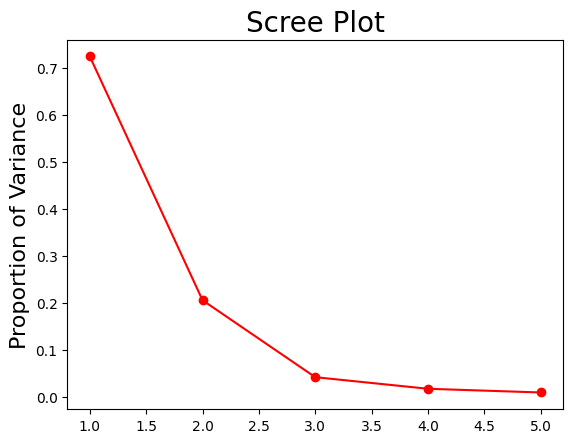

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
merged_cereal_wide_scaled = StandardScaler().fit_transform(merged_cereal_wide)
df_scaled = pd.DataFrame(data=merged_cereal_wide_scaled, 
                                columns=merged_cereal_wide.columns)
df_scaled_intresting = df_scaled[["Germany", "Portugal", "France", "China", "world_wide"]]
pca = PCA(n_components=5)
pca.fit_transform(df_scaled_intresting)
eigenvalues = pca.explained_variance_ # eigenvalues
prop_var = pca.explained_variance_ratio_ # proportion of explained variance
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()